In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [104]:
df = pd.read_csv("C:/Users/Owen/Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


So our model have a data type Object, and have 3 data type Int as well

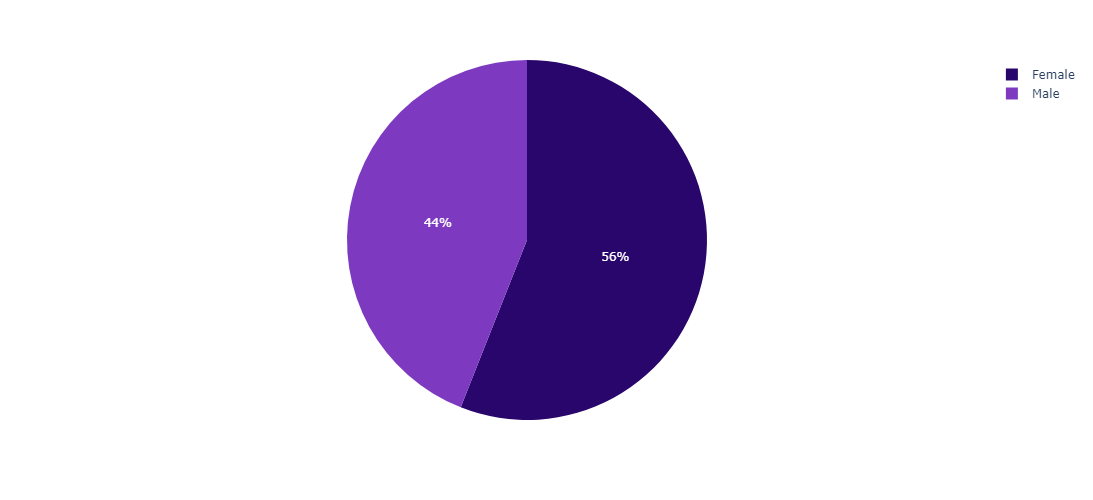

In [109]:
fig = px.pie(df, 'Gender', color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'], template='plotly', width=500,height=500)
fig.show()

In [110]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


So im gonna drop column CustomerID because this column is not usefull for our Model, and as you can see on the Standar deviasi each feature we can conclude that Annual income and spending score are important feature because they have a std that more than 20, in other hand Age is not that good to be a feature, but I think it would be better if Iam not dropping this feature

In [114]:
df.drop('CustomerID',axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [116]:
x = [Var for Var in df.columns if df[Var].dtypes != 'O']
df[x].columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [118]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

So our Feature its so good because there are not have a missing value

In [121]:
df.duplicated().sum()

0

In [123]:
Male = df[df['Gender'] == 'Male']
Male.groupby('Gender')['Annual Income (k$)'].agg(['mean','sum','count'])

,mean,sum,count
Gender,,,
Male,62.227273,5476,88


In [125]:
Female = df[df['Gender'] == 'Female']
Female.groupby('Gender')['Annual Income (k$)'].agg(['mean','sum','count'])

,mean,sum,count
Gender,,,
Female,59.25,6636,112


<Axes: xlabel='Annual Income (k$)', ylabel='count'>

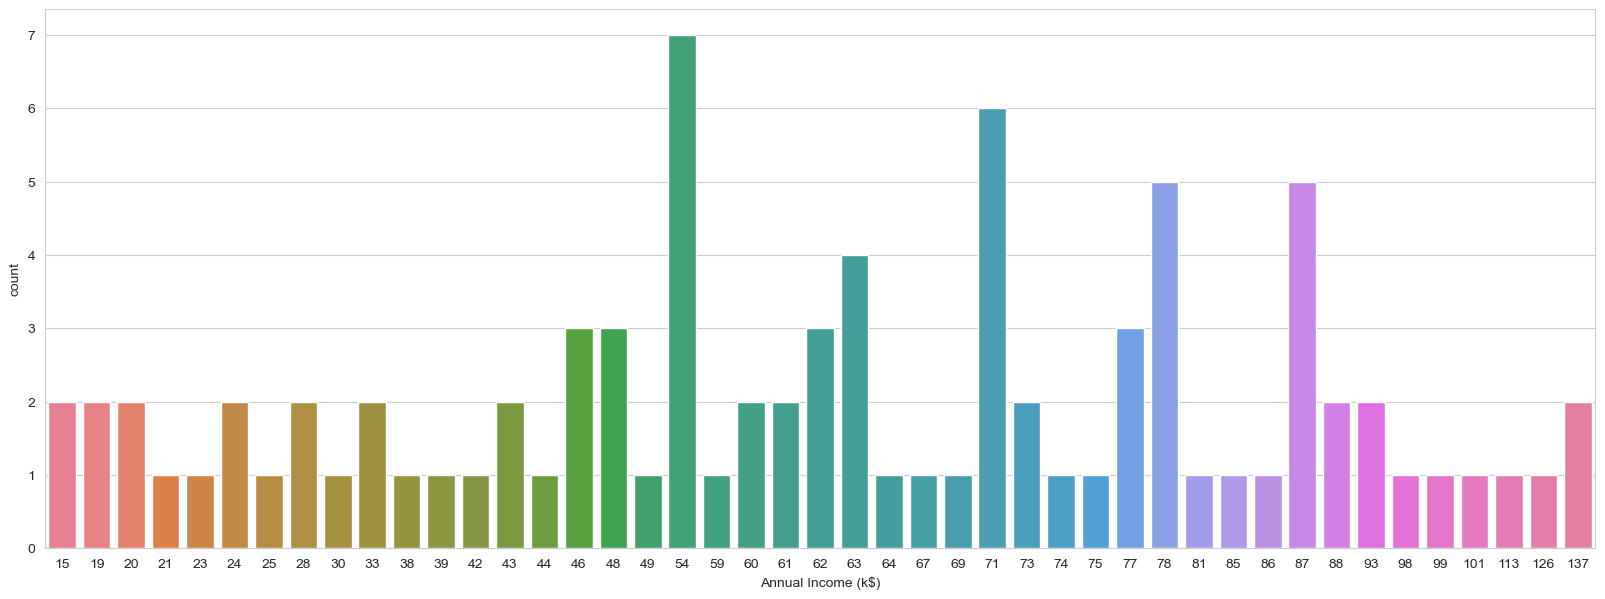

In [127]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,7))
sns.countplot(data = Male, x = 'Annual Income (k$)', palette='husl')

<Axes: xlabel='Annual Income (k$)', ylabel='count'>

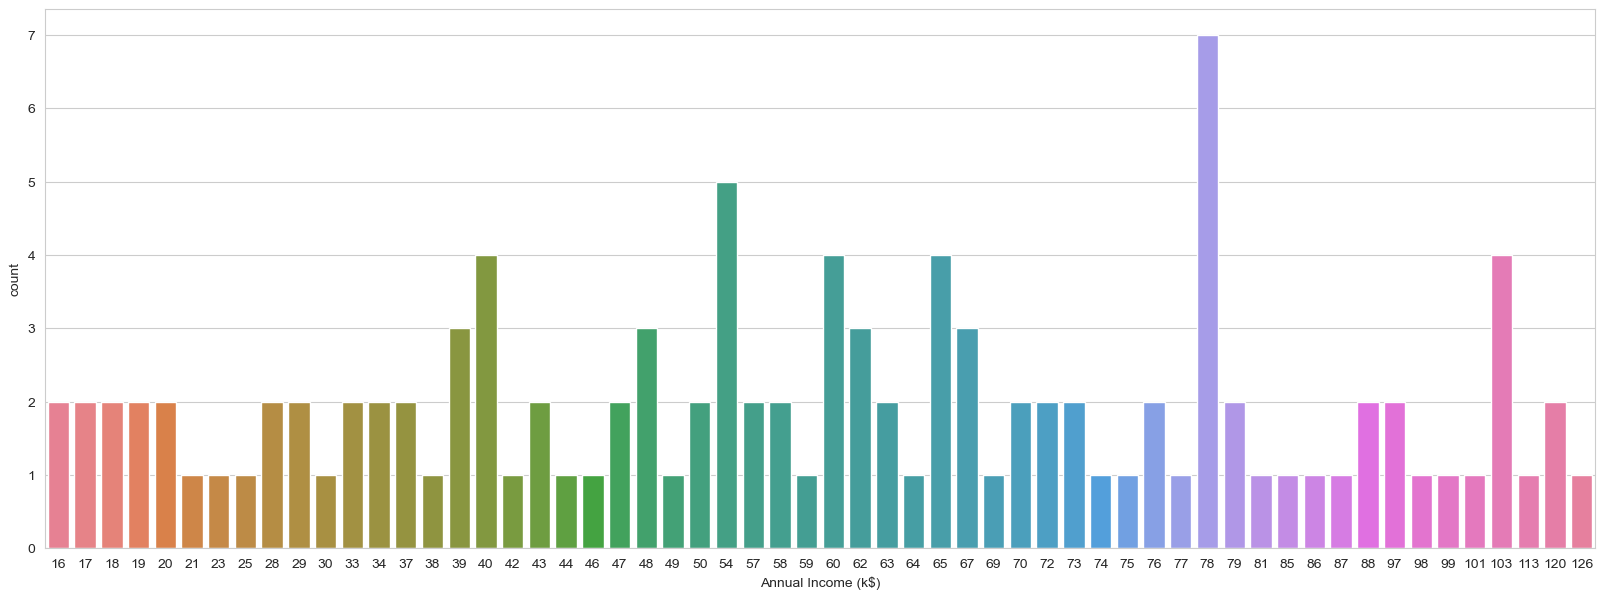

In [128]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,7))
sns.countplot(data=Female, x='Annual Income (k$)', palette='husl')

so now we already know about Annual income by a man, Most of man (88) have a 54 dollar, and mean 64, 
and for female .... 

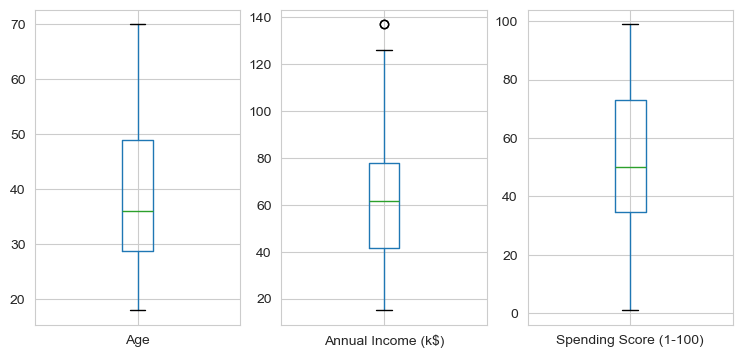

In [130]:
plt.figure(figsize=(9,9))
n = 0
for i in x:
    n += 1
    plt.subplot(2,3,n)
    df.boxplot(i)

so we have a outlier but its okay because i think its make sense, so dont worry about that

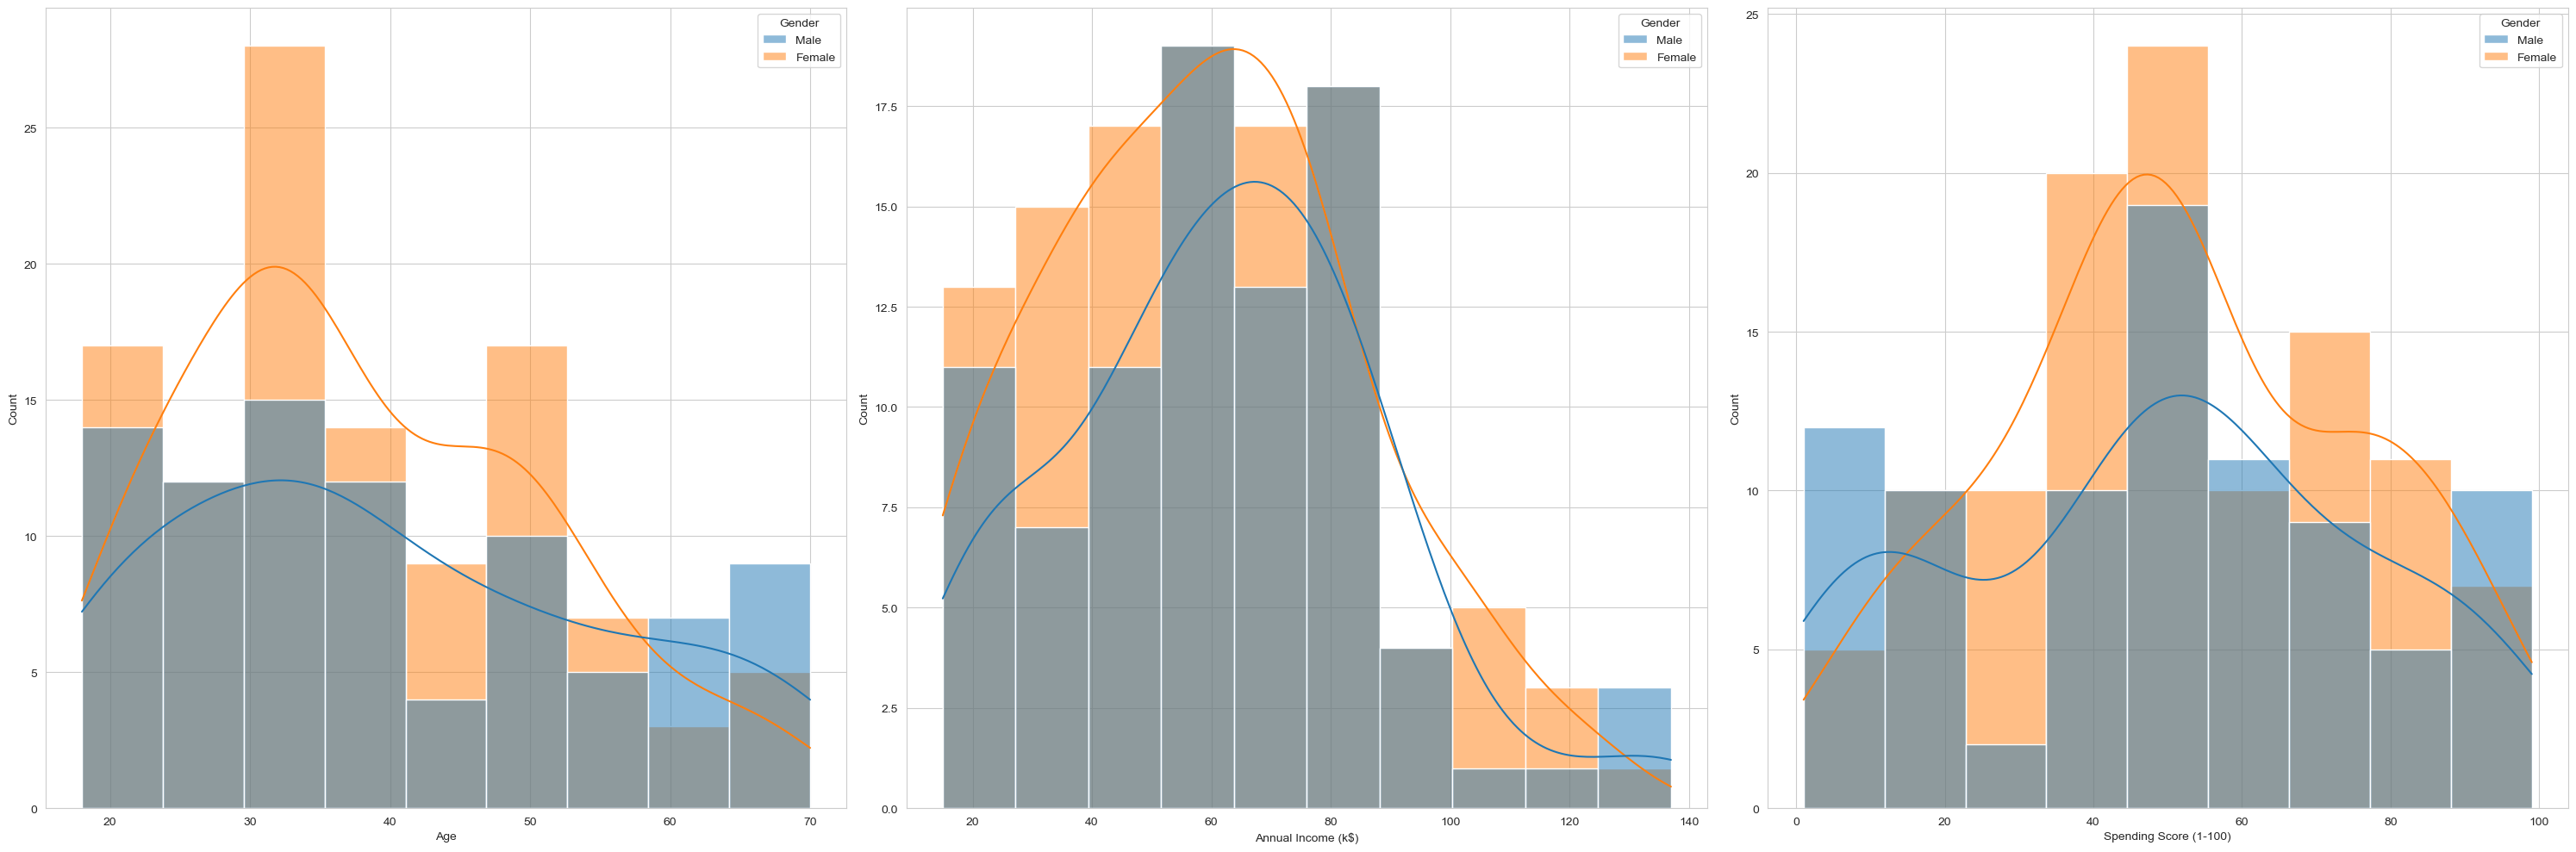

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
for i, col in enumerate(x):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i], hue='Gender')
plt.tight_layout()
plt.show()

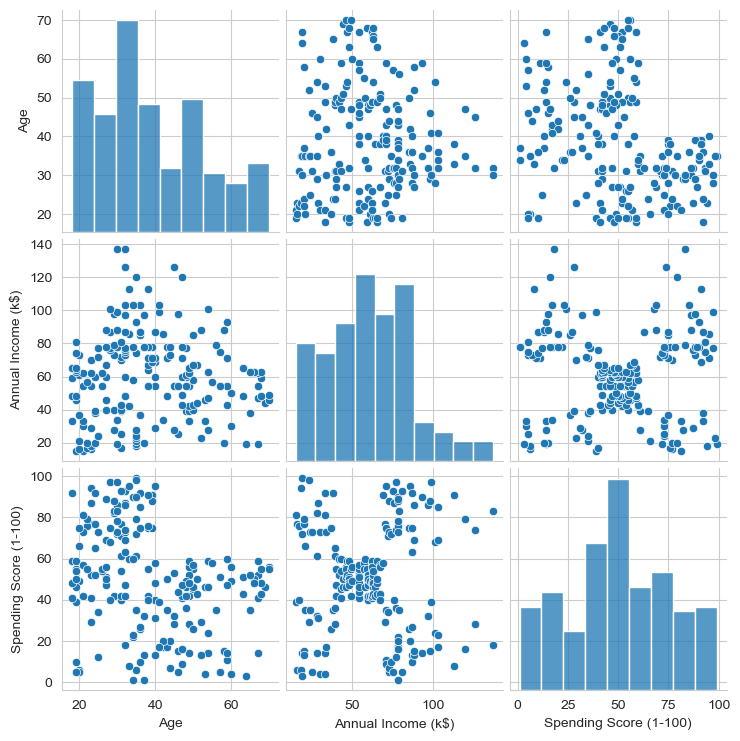

In [134]:
sns.pairplot(data=df)

# K

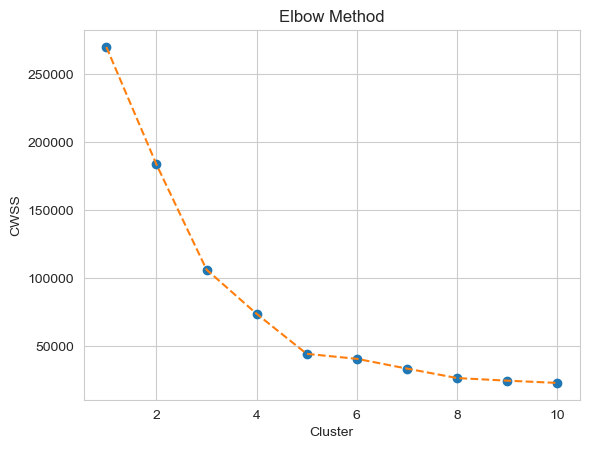

In [136]:
X = df.iloc[:, [2, 3]].values
k = np.arange(1,11)
inertia = []
for i in k :
    Model = KMeans(n_clusters = i, init='k-means++', random_state=42)
    Model.fit(X)
    inertia.append(Model.inertia_)
    
plt.plot(k, inertia, 'o')
plt.plot(k, inertia, '--')
plt.title('Elbow Method')
plt.xlabel('Cluster')
plt.ylabel('CWSS')
plt.show()

I think K=5 its the best K by elbow method

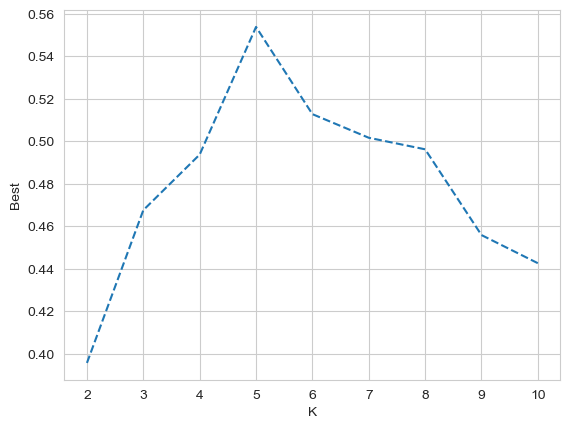

In [138]:
from sklearn.metrics import silhouette_score

silhouette = []
k = np.arange(2,11)
for i in k :
    Model = KMeans(n_clusters = i, init='k-means++', random_state=42)
    Model.fit(X)
    a = silhouette_score(X, Model.labels_)
    silhouette.append(a)

plt.plot(k, silhouette, '--')
plt.xticks(k)
plt.xlabel('K')
plt.ylabel('Best')
plt.show()

SO yuppp k=5 its the best cluster

In [141]:
Model5 = KMeans(n_clusters=5,  init='k-means++', max_iter =900, random_state=42)
Model5.fit_predict(X)
Model5.inertia_

44448.45544793371

In [143]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [144]:
labels = Model5.labels_
centroid = Model5.cluster_centers_

h = 0.02
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Model5.predict(np.c_[xx.ravel(), yy.ravel()])

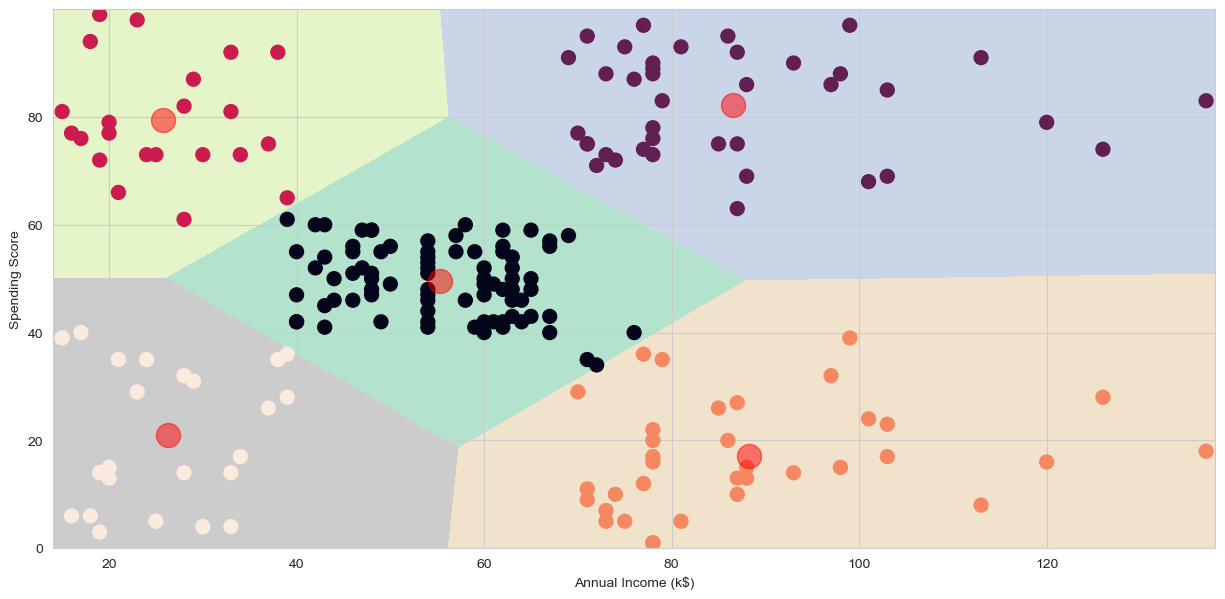

In [145]:
plt.figure(1, figsize = (15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')


plt.scatter( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=df, c = labels, s=100)
plt.scatter( x = centroid[:,0], y=centroid[:,1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score')
plt.xlabel('Annual Income (k$)')
plt.show()

<Axes: xlabel='Spending Score (1-100)', ylabel='count'>

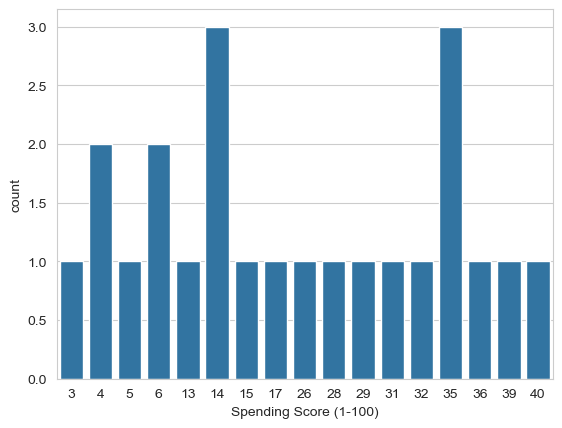

In [146]:
df['Predict'] = Model5.labels_
a = df[df['Predict'] == 4]
c = a.groupby('Annual Income (k$)')['Spending Score (1-100)'].value_counts()
sns.countplot(data=a, x='Spending Score (1-100)')

In [148]:
a.groupby('Annual Income (k$)')['Spending Score (1-100)'].agg(['mean','count','sum'])

,mean,count,sum
Annual Income (k$),,,
15,39.0,1,39
16,6.0,1,6
17,40.0,1,40
18,6.0,1,6
19,8.5,2,17
20,14.0,2,28
21,35.0,1,35
23,29.0,1,29
24,35.0,1,35


In [149]:
df['Predict'].unique()

array([4, 2, 0, 1, 3])

In [150]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Predict
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


In [155]:
for i in range(0,5) :
    c = df.drop('Gender', axis=1)
    b = c[c['Predict'] == i]
    a = b.groupby('Annual Income (k$)')[['Spending Score (1-100)', 'Age']].agg(['mean', 'count','sum'])
    print(i ,'=', a )

0 =                    Spending Score (1-100)                   Age           
                                     mean count  sum       mean count  sum
Annual Income (k$)                                                        
39                              61.000000     1   61  31.000000     1   31
40                              46.500000     4  186  34.250000     4  137
42                              56.000000     2  112  41.000000     2   82
43                              50.000000     4  200  46.750000     4  187
44                              48.000000     2   96  60.000000     2  120
46                              52.000000     4  208  42.250000     4  169
47                              55.500000     2  111  60.500000     2  121
48                              52.333333     6  314  40.500000     6  243
49                              48.500000     2   97  58.500000     2  117
50                              52.500000     2  105  60.000000     2  120
54                   

In [157]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [158]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Predict
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


In [159]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Predict
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


In [160]:
from sklearn.decomposition import PCA
pca = PCA()
c = df.drop(columns=['Gender','Predict'], axis=1)
pca.fit_transform(c)
pca.explained_variance_ratio_

array([0.45125272, 0.44098465, 0.10776263])

In [172]:
D = pca.explained_variance_ratio_
g = np.cumsum(D)

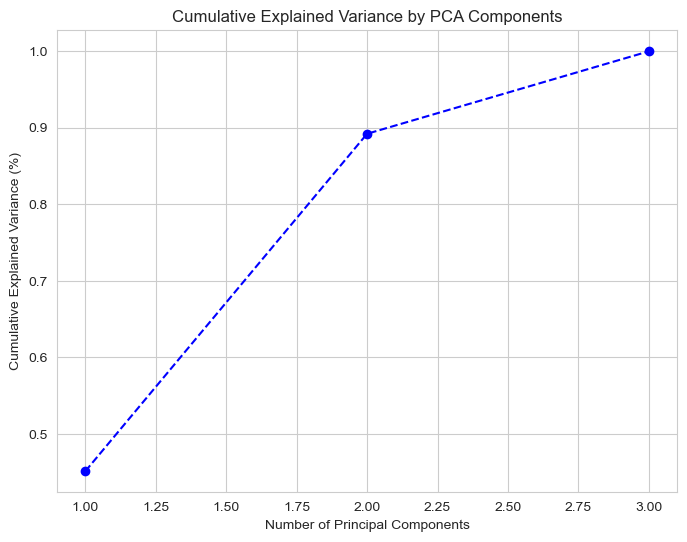

In [174]:
plt.figure(figsize=(8,6))
plt.plot(range(1,len(g) +1), g, marker='o', linestyle='--', color='b')

# Tambahkan label dan judul
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)

# Tampilkan grafik
plt.show()

jadi bisa kita liat bahwa hmm pc1 menyumbang 45% sedangkan pc2 menyumbang 

In [43]:
loading = pca.components_
feature = c.columns 
pd.DataFrame(loading, columns=feature, index = ['PC1', 'PC2'])

,Age,Annual Income (k$),Spending Score (1-100)
PC1,-0.188974,0.588641,0.785997
PC2,0.130965,0.808376,-0.573914


Seperti yang kita bisa liat bahwa kita cuman perlu feature 2 dan 3, kenapa gk ambil age, karena dia cuman bisa memberikan 18% dan 13% pada pc2 dibandingkan 2 feature lainnya

In [46]:
from scipy import stats
male_spending = df[df['Gender'] == 'Male']['Spending Score (1-100)']
female_spending = df[df['Gender'] == 'Female']['Spending Score (1-100)']

# Uji T-test
t_stat, p_value = stats.ttest_ind(male_spending, female_spending)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.8190464150660334, P-value: 0.4137446589852174


In [47]:
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35], labels=["18-25", "26-35"])

# ANOVA
anova_result = stats.f_oneway(df[df['Age Group'] == '18-25']['Spending Score (1-100)'],
                              df[df['Age Group'] == '26-35']['Spending Score (1-100)'])
print(f"F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")

F-statistic: 3.5281304667267954, P-value: 0.06350274749795329


In [49]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Predict,Age Group
0,Male,19,15,39,4,18-25
1,Male,21,15,81,2,18-25
2,Female,20,16,6,4,18-25
3,Female,23,16,77,2,18-25
4,Female,31,17,40,4,26-35
...,...,...,...,...,...,...
195,Female,35,120,79,1,26-35
196,Female,45,126,28,3,NaN
197,Male,32,126,74,1,26-35
198,Male,32,137,18,3,26-35
